# Assessing Fit (Polynomial Regression)

In this notebook we will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a mean to examine this topic. 

**outline for this notebook**
* In this notebook, we will write a function to take a dataframe and a degree. Then, return a dataframe where each column is the dataframe to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the dataframe, column 2 is the dataframe squared and column 3 is the dataframe cubed
* we will use seaborn to visualize polynomial regressions
* we will use seaborn to visualize the same polynomial degree on different subsets of the data
* we will use a validation set to select a polynomial degree
* we will assess the final fit using test data

We will continue to use the House data.

## import library

In [44]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model
import matplotlib.pyplot as plt

## read data in

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [89]:
df = pd.read_csv("kc_house_data.csv")
colname_lst = list(df.columns.values)
coltype_lst =  [str, str, float, float, float, float, int, str, int, int, int, int, int, int, int, int, str, float, float, float, float]
col_type_dict = dict(zip(colname_lst, coltype_lst))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In this notebook, we will primarily experiment on "price" and "sqft_living". Therefore, we will sort our data first for latter use. 

In [91]:
data = data.sort(['sqft_living', 'price'], ascending=[1, 0])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
21332,9266700190,20150511T000000,245000,1,1.00,390,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100


Next we are going to write a polynomial function that takes a dataframe and a maximal degree. Then, returns a dataframe with columns containing the dataframe to all the powers up to the maximal degree.

The easiest way to apply a power to a dataframe is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: 

In [92]:
tmp = pd.DataFrame([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

   0
0  1
1  2
2  3
    0
0   1
1   8
2  27


We can create an empty dataframe using graphlab.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [93]:
tmp_cubed.columns = ["power_1"]
tmp_cubed

,power_1
0,1
1,8
2,27


## create polynomial dataframe function

We will use what we have tired above to implement dataframe consisting of the powers of a dataframe up to a specific degree:

In [94]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # and set polynomial_df['power_1'] equal to the passed feature
    # use deep copy here. otherwise, it will do shallow copy. 
    polynomial_df = feature.copy(deep=True)
    polynomial_df.columns = ["power_1"]
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign polynomial_df[name] to the appropriate power of feature
            polynomial_df[name]=feature.apply(lambda x: x**power)
    return polynomial_df

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [95]:
tmp

,0
0,1
1,2
2,3


In [96]:
polynomial_dataframe(tmp, 5)

,power_1,power_2,power_3,power_4,power_5
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243


# visualizing polynomial regression

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [97]:
poly1_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 1)
poly1_data["price"] = data["price"] #add price to the data since it's the target
poly1_data.tail()

,power_1,price
8092,9640,4668000
9254,9890,6885000
3914,10040,7062500
7252,12050,7700000
12777,13540,2280000


Now, let's make the model from sklearn library

In [98]:
# Create linear regression object
regfit = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regfit.fit(poly1_data.iloc[:,0].to_frame(), poly1_data.iloc[:,1].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's look at the coefficient of our fit

In [99]:
"intercept: ", regfit.intercept_ 

('intercept: ', array([-43580.74309448]))

In [100]:
"coefficients: ", regfit.coef_ 

('coefficients: ', array([[ 280.6235679]]))

Now we will visualise our data against the fitted line from the model we built.

In [101]:
#predict "power_1"
poly1_data["predicted"] = regfit.predict(poly1_data.iloc[:,0].to_frame())

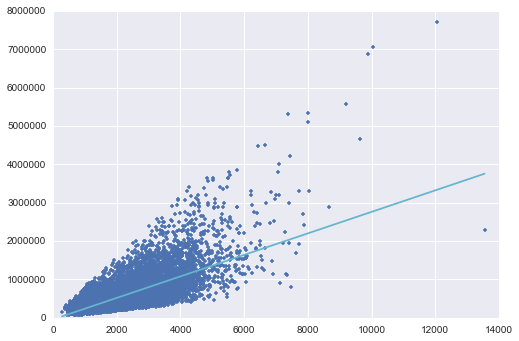

In [102]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'b.',
        poly1_data['power_1'], poly1_data["predicted"],'c-')

Let's unpack that plt.plot() command. The first pair of dataframe we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [103]:
poly2_data = polynomial_dataframe(pd.DataFrame(data["sqft_living"]), 2)
features2 = list(poly2_data.columns.values) # get the name of the features
poly2_data["price"] = data["price"] # add price to the data since it's the target
# Create linear regression object
regfit2 = linear_model.LinearRegression(fit_intercept=True)
#train model
regfit2.fit(poly2_data[features2], poly2_data.iloc[:,(len(poly2_data.columns)-1)].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's inspect the coefficients

In [104]:
"intercept: ", regfit2.intercept_ 

('intercept: ', array([ 199222.27930548]))

In [105]:
"coefficients: ", regfit2.coef_ 

('coefficients: ', array([[  6.79940947e+01,   3.85812609e-02]]))

Now we will visualise our data against the fitted line from the model we built.

In [106]:
#let's make the prediction first
poly2_data["predicted"] = regfit2.predict(poly2_data[features2])

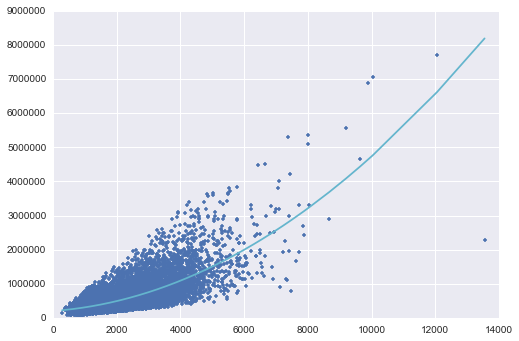

In [107]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'b.',
        poly2_data['power_1'], poly2_data["predicted"],'c-')

The resulting model looks like half a parabola. Let's try what the cubic looks like:

In [ ]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)

In [ ]:
my_features3 = poly3_data.column_names() # get the name of the features
print my_features3
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features3, validation_set = None)

Now try a 15th degree polynomial:

In [ ]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)

In [ ]:
my_features15 = poly15_data.column_names() # get the name of the features
print my_features15
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features15, validation_set = None)

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [ ]:
#split data into dataset 1,2 and dataset 3,4
set12, set34 = sales.random_split(0.5, seed=0)
#now split dataset 1,2 into dataset 1 and dataset 2
set_1, set_2 = set12.random_split(0.5, seed=0)#
#now split dataset 3,4 into dataset 3 and dataset 4
set_3, set_4 = set34.random_split(0.5, seed=0)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [ ]:
def set_training_print_plot(dataset, degree, setnumber):
    poly_data = polynomial_sframe(dataset['sqft_living'], degree)
    my_features = poly_data.column_names() # get the name of the features
    print my_features
    poly_data['price'] = dataset['price'] # add price to the data since it's the target
    model = graphlab.linear_regression.create(poly_data, target = 'price', features = my_features, validation_set = None)
    model.get("coefficients").print_rows(num_rows = 16)
    plt.plot(poly_data['power_1'],poly_data['price'],'.',
    poly_data['power_1'], model.predict(poly_data),'-')

In [ ]:
set_training_print_plot(set_1, 15, 1)

In [ ]:
set_training_print_plot(set_2, 15, 2)

In [ ]:
set_training_print_plot(set_3, 15, 3)

In [ ]:
set_training_print_plot(set_4, 15, 4)

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [ ]:
train_validation_data, test_data =sales.random_split(0.9, seed=1)
train_data, validation_data = train_validation_data.random_split(0.5, seed=1)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [ ]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predicted_price = model.predict(data)
    # Then compute the residuals/errors
    residuals = predicted_price - outcome
#     print residuals
    # Then square and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)    


for degree in range(1, 16):
    poly_data = polynomial_sframe(train_data['sqft_living'], degree)
    my_features = poly_data.column_names() # get the name of the features
    print my_features
    poly_data['price'] = train_data['price'] # add price to the data since it's the target
    model = graphlab.linear_regression.create(poly_data, target = 'price', features = my_features, verbose = False, validation_set = None)
    model.get("coefficients")
    
    vali_poly_data = polynomial_sframe(validation_data['sqft_living'], degree)
    vali_poly_data['price'] = validation_data['price'] # add price to the data since it's the target
    print 'RSS', get_residual_sum_of_squares(model, vali_poly_data, vali_poly_data['price'])

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [ ]:
degree = 6
test_poly_data = polynomial_sframe(test_data['sqft_living'], degree)
test_poly_data['price'] = test_data['price'] # add price to the data since it's the target
print 'test-data, RSS', get_residual_sum_of_squares(model, test_poly_data, test_poly_data['price'])

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**